# Week 6 Case Study on measures of Central tendency and Dispersion 

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to read the data set
student_data = pd.read_csv("StudentsPerformance.csv")

In [4]:
# to display the data
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [11]:
# to find the null values and datatypes
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Qtn.1

**To find how many male and female participated in the test**

In [14]:
student_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Qtn.2

**Analyse about student's parent level of education.** 

In [23]:
student_data['parental level of education'].value_counts()



some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

**Inference : Out of 1000 parents  ,22.6% had some college level education
                                   ,22.2% had an associate degree
                                   ,19.6% had a high school level of education
                                   ,17.9% had gone to some high school
                                   ,11.8% hold a bachelor's degree
                                   and only 5.9% completed master's degree**

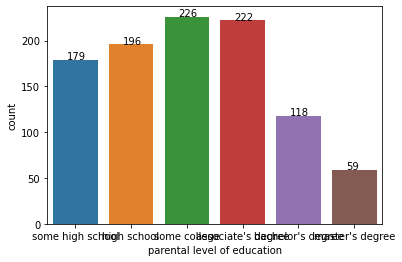

In [5]:
ax = sns.countplot(x= 'parental level of education', data = student_data)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))
plt.show()


# Qtn.3

**Who scores the most on average for math, reading and writing based on**


**a● Gender**

**b● Test preparation course**

# Qtn.4

**What do you think about the scoring variation for math, reading and writing based on**

**a● Gender**

**b● Test preparation course**

In [45]:
# Creating a data frame by grouping 'gender' column
student_gender = student_data.groupby(['gender'])

In [51]:
#displaying the data frame grouped by gender 'female'
student_gender.get_group('female')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
513,female,group E,bachelor's degree,standard,completed,99,100,100
514,female,group E,high school,standard,none,99,93,90
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100


In [46]:
# finding the mean & standard deviation of 'math score' column in the new dataframe
Maths_avg_std = student_gender['math score'].agg(['mean','std'])
Maths_avg_std

,mean,std
gender,,
female,63.376448,16.029928
male,68.821577,14.556411


In [47]:
# finding the mean & standard deviation of 'reading score' column in the new dataframe
Read_score_avg_std = student_gender['reading score'].agg(['mean','std'])
Read_score_avg_std

,mean,std
gender,,
female,72.590734,14.411018
male,65.545643,14.149594


In [49]:
# finding the mean & standard deviation of 'writing score' column in the new dataframe
Write_score_avg_std = student_gender['writing score'].agg(['mean','std'])
Write_score_avg_std

,mean,std
gender,,
female,72.467181,14.844842
male,63.446058,14.227225


In [50]:
# using concat function to display the output of above 3 codes
avg_gender = pd.concat([Maths_avg_std, Read_score_avg_std, Write_score_avg_std],axis='columns',sort=False)
avg_gender

,mean,std,mean,std,mean,std
gender,,,,,,
female,63.376448,16.029928,72.590734,14.411018,72.467181,14.844842
male,68.821577,14.556411,65.545643,14.149594,63.446058,14.227225


# Inference on qtn.3a

***Male students scores the most on average in maths**

***Female students scores the most on average in reading**

***Female students scores the most on average in writing** 

# Inference on qtn.4a

***Male students show slight more variation in math score as compared to female students**

***The reading score shows almost same variation for both male and female students**  

***The writing score also shows almost same variation for both male and female students**

In [18]:
student_test_prep = student_data.groupby(['test preparation course'])

In [23]:
student_test_prep.get_group('completed')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
5,female,group B,high school,free/reduced,completed,23,44,36
10,female,group C,some high school,free/reduced,completed,29,40,44
12,female,group B,some high school,standard,completed,32,51,44
16,female,group A,high school,free/reduced,completed,34,48,41
21,female,group D,some high school,free/reduced,completed,35,55,60
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [41]:
math_test_prep_avg_std = student_test_prep['math score'].agg(['mean','std'])
math_test_prep_avg_std

,mean,std
test preparation course,,
completed,69.96648,14.521847
none,63.78972,15.705689


In [42]:
Read_test_prep_avg_std = student_test_prep['reading score'].agg(['mean','std'])
Read_test_prep_avg_std

,mean,std
test preparation course,,
completed,74.175978,13.537572
none,66.417445,14.608896


In [43]:
Write_test_prep_avg_std = student_test_prep['writing score'].agg(['mean','std'])
Write_test_prep_avg_std

,mean,std
test preparation course,,
completed,74.684358,13.236412
none,64.457944,15.041667


In [44]:
avg_std_test_prep = pd.concat([math_test_prep_avg_std, Read_test_prep_avg_std, Write_test_prep_avg_std],axis='columns',sort=False)
avg_std_test_prep

,mean,std,mean,std,mean,std
test preparation course,,,,,,
completed,69.96648,14.521847,74.175978,13.537572,74.684358,13.236412
none,63.78972,15.705689,66.417445,14.608896,64.457944,15.041667


# Inference on qtn 3b

***Students who had completed test preparation course scored most on average in maths.**

***Students who had completed test preparation course scored most on average in reading.**

***Students who had completed test preparation course scored most on average in writing.**

# Inference on qtn 4b

***Students who completed the test preparation course shows less variation in maths score as compared to those who did not completed it**
       


***The variation in reading score in students who completed the test preparation course is less than those who did not completed**


***Also the variation in writing score of those who finished the test preparation course is less than other students**

# Qtn 5

 **The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.**

In [94]:
# displaying the math score of all students
student_math = student_data[['gender','math score']]
student_math

,gender,math score
0,female,0
1,female,8
2,female,18
3,female,11
4,female,22
...,...,...
995,male,99
996,male,100
997,male,100
998,male,100


In [95]:
# sorting the math score of all students
student_math_sorted=student_math.sort_values(by='math score',ascending=False)
student_math_sorted

,gender,math score
999,male,100
996,male,100
515,female,100
517,female,100
516,female,100
...,...,...
2,female,18
51,female,13
3,female,11
1,female,8


In [86]:

pd.set_option('display.max_rows',250)


In [87]:
student_math_sorted

,gender,math score
999,male,100
997,male,100
998,male,100
996,male,100
515,female,100
...,...,...
2,female,18
51,female,13
3,female,11
1,female,8


**The above dataframe consists of the top 25%(here 250) students based on their maths score**